In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [2]:
train_path = "E:/Intel Data/seg_train"
validation_path =  "E:/Intel Data/seg_test"

In [3]:
training_datagen=ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

training_data=training_datagen.flow_from_directory(train_path,
                                                   target_size=(150,150),
                                                   batch_size=32)                                                 

Found 6977 images belonging to 3 classes.


In [4]:
training_data.class_indices

{'buildings': 0, 'mountain': 1, 'sea': 2}

In [5]:
valid_datagen=ImageDataGenerator(rescale=1./255)

validation_data=valid_datagen.flow_from_directory(validation_path,
                                                   target_size=(150,150),
                                                   batch_size=32)

Found 1472 images belonging to 3 classes.


In [6]:
validation_data.class_indices

{'buildings': 0, 'mountain': 1, 'sea': 2}

In [8]:
for image_batch, labels_batch in training_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 150, 150, 3)
(32, 3)


In [9]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=[150,150,3]))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [10]:
#lr_schedule=tensorflow.keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=1.0,
#    decay_steps=1000,
#    decay_rate=0.1)

In [11]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
from keras.backend import clear_session
clear_session()

In [13]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 3, verbose = 1,restore_best_weights = True)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               8294500   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [15]:
history = model.fit(training_data, epochs=20,verbose=1, validation_data=validation_data,callbacks=earlystop)

Epoch 1/20
219/219 [==============================] - 312s 1s/step - loss: 1.0112 - accuracy: 0.5445 - val_loss: 0.7770 - val_accuracy: 0.6243
Epoch 2/20
219/219 [==============================] - 245s 1s/step - loss: 0.7220 - accuracy: 0.6808 - val_loss: 0.5543 - val_accuracy: 0.7731
Epoch 3/20
219/219 [==============================] - 298s 1s/step - loss: 0.6329 - accuracy: 0.7356 - val_loss: 0.5338 - val_accuracy: 0.7785
Epoch 4/20
219/219 [==============================] - 287s 1s/step - loss: 0.6053 - accuracy: 0.7470 - val_loss: 0.5914 - val_accuracy: 0.7615
Epoch 5/20
219/219 [==============================] - 277s 1s/step - loss: 0.5710 - accuracy: 0.7586 - val_loss: 0.4490 - val_accuracy: 0.8207
Epoch 6/20
219/219 [==============================] - 240s 1s/step - loss: 0.5394 - accuracy: 0.7810 - val_loss: 0.5705 - val_accuracy: 0.7819
Epoch 7/20
219/219 [==============================] - 251s 1s/step - loss: 0.5121 - accuracy: 0.7909 - val_loss: 0.4761 - val_accuracy: 0.8166

In [16]:
from keras.applications.vgg16 import VGG16
vgg_model = VGG16(input_shape=[150,150,3], weights='imagenet', include_top=False)

In [17]:
for layer in vgg_model.layers: 
    layer.trainable = False

In [18]:
from keras.layers import Flatten,Dense
x = Flatten()(vgg_model.output)
prediction = Dense(3, activation='softmax')(x)

In [19]:
from keras.models import Model
model = Model(vgg_model.input, prediction)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [21]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
from keras.backend import clear_session
clear_session()

In [23]:
history = model.fit(training_data, epochs=10,verbose=1, validation_data=validation_data,callbacks=earlystop)

Epoch 1/10
219/219 [==============================] - 1359s 6s/step - loss: 0.3350 - accuracy: 0.8686 - val_loss: 0.2562 - val_accuracy: 0.8899
Epoch 2/10
219/219 [==============================] - 1421s 6s/step - loss: 0.2763 - accuracy: 0.8912 - val_loss: 0.2055 - val_accuracy: 0.9253
Epoch 3/10
219/219 [==============================] - 1427s 7s/step - loss: 0.2456 - accuracy: 0.9023 - val_loss: 0.1815 - val_accuracy: 0.9375
Epoch 4/10
219/219 [==============================] - 1410s 6s/step - loss: 0.2288 - accuracy: 0.9086 - val_loss: 0.2137 - val_accuracy: 0.9130
Epoch 5/10
219/219 [==============================] - 1318s 6s/step - loss: 0.2160 - accuracy: 0.9182 - val_loss: 0.1914 - val_accuracy: 0.9321
Epoch 6/10
219/219 [==============================] - 1282s 6s/step - loss: 0.2161 - accuracy: 0.9149 - val_loss: 0.2125 - val_accuracy: 0.9246
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


In [ ]:
#train_loss, train_acc=model.evaluate(training_data)
#print("Train Loss: {0} - Train Acc: {1}".format(train_loss,train_acc))

In [ ]:
#test_loss, test_acc=model.evaluate(validation_data)
#print("Test Loss: {0} - Test Acc: {1}".format(test_loss,test_acc))

In [24]:
prediction_path =  "E:/Intel Data/seg_pred2"

In [25]:
prediction_data=valid_datagen.flow_from_directory(prediction_path,
                                                   target_size=(150,150),
                                                   batch_size=32)

Found 2092 images belonging to 3 classes.


In [26]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [27]:
print("[INFO] evaluating network...")
prediction_data.reset()
predIdxs = model.predict(x=prediction_data, steps=(2092 // 32) + 1)

[INFO] evaluating network...


In [28]:
predIdxs.shape

(2092, 3)

In [29]:
predIdxs = np.argmax(predIdxs, axis=1)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(prediction_data.classes, predIdxs,
target_names=prediction_data.class_indices.keys()))

              precision    recall  f1-score   support

   buildings       0.30      0.28      0.29       601
    mountain       0.45      0.41      0.43       930
         sea       0.31      0.36      0.33       561

    accuracy                           0.36      2092
   macro avg       0.35      0.35      0.35      2092
weighted avg       0.37      0.36      0.36      2092



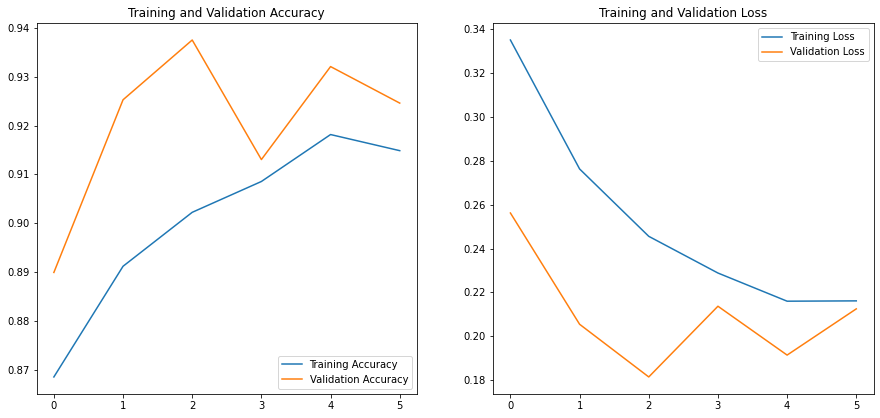

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(6)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()